In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading train and test data

train1 = pd.read_csv("../Dataset/train.csv") 
test1 = pd.read_csv("../Dataset/test.csv") 

In [3]:
# Checking number of rows and columns

print(train1.shape)
print(test1.shape)

(76020, 371)
(75818, 370)


In [4]:
# Analysing some basic Statistics

train1.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# Checking NAN values

print(train1.isnull().values.sum())
print(test1.isnull().values.sum())

0
0


In [44]:
#Checking data balance according to target variable

Positive = train1[train1["TARGET"] == 1]
Positive.shape

(3008, 371)

In [45]:
Negative = train1[train1["TARGET"] == 0]
Negative.shape

(73012, 371)

In [46]:
train2 = train1[train1["TARGET"] == 0].sample(3008).append(train1[train1["TARGET"] == 1])

In [47]:
train2.shape

(6016, 371)

In [49]:
train2[train2["TARGET"] == 1].shape

(3008, 371)

In [50]:
train2[train2["TARGET"] == 0].shape

(3008, 371)

In [58]:
# Removing columns with correlation lower than 0.15 to the target variable

train_corr = train2.corr(method = 'pearson')["TARGET"]
train_corr = train_corr.fillna(0)

train3 = train2
test2 = test1
for i in range(len(train_corr)):
    if abs(train_corr[i]) < 0.15:
        train3 = train3.drop(train_corr.index[i],1)
        test2 = test2.drop(train_corr.index[i],1)
        


In [59]:
# Looking at new dataset

train3.describe()

,var15,ind_var5,ind_var30,num_var4,num_var5,num_var30,num_var35,num_var42,var36,num_meses_var5_ult3,TARGET
count,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000
mean,36.163065,0.510472,0.574967,0.903923,1.539894,1.851064,2.773604,1.735372,52.502992,1.520778,0.500000
std,13.006981,0.499932,0.494389,0.985216,1.517448,1.729724,3.094458,1.597208,48.430749,1.394169,0.500042
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,33.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,99.000000,2.000000,0.500000
75%,44.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,99.000000,3.000000,1.000000
max,102.000000,1.000000,1.000000,5.000000,9.000000,18.000000,21.000000,9.000000,99.000000,3.000000,1.000000


In [60]:
test2.describe()

,var15,ind_var5,ind_var30,num_var4,num_var5,num_var30,num_var35,num_var42,var36,num_meses_var5_ult3
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000
mean,33.138832,0.663747,0.733968,1.081656,1.998760,2.390052,3.304598,2.220264,40.596653,1.982906
std,12.932000,0.472430,0.441884,0.911603,1.431179,1.645903,2.872312,1.501184,47.387911,1.296633
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,27.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,39.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,99.000000,3.000000
max,105.000000,1.000000,1.000000,9.000000,12.000000,24.000000,42.000000,15.000000,99.000000,3.000000


In [61]:
abs(train3.corr(method = 'pearson')["TARGET"]).sort_values()

num_var35              0.181147
num_var4               0.186617
var36                  0.247001
var15                  0.270451
num_var5               0.320764
ind_var5               0.323542
num_var42              0.324729
num_var30              0.339639
ind_var30              0.341291
num_meses_var5_ult3    0.351154
TARGET                 1.000000
Name: TARGET, dtype: float64

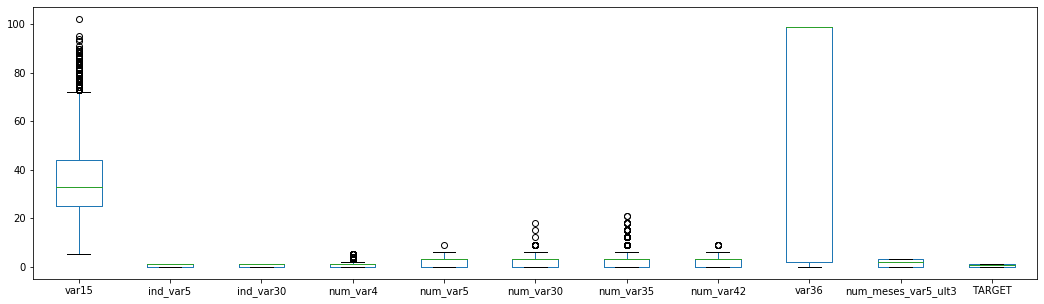

In [63]:
train3.boxplot(grid = False, figsize = (18,5))

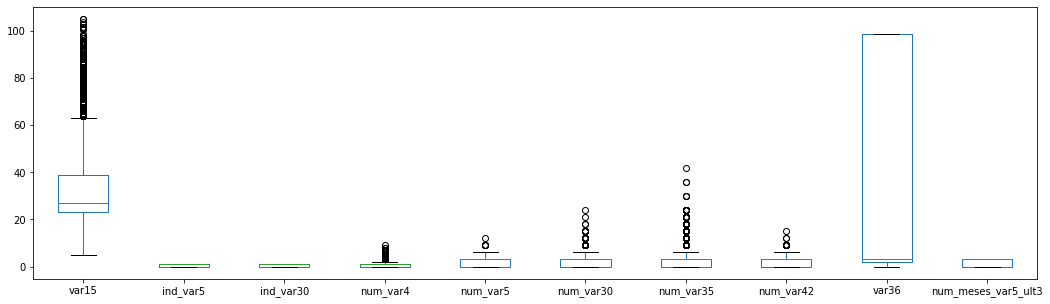

In [64]:
test2.boxplot(grid = False, figsize = (18,5))

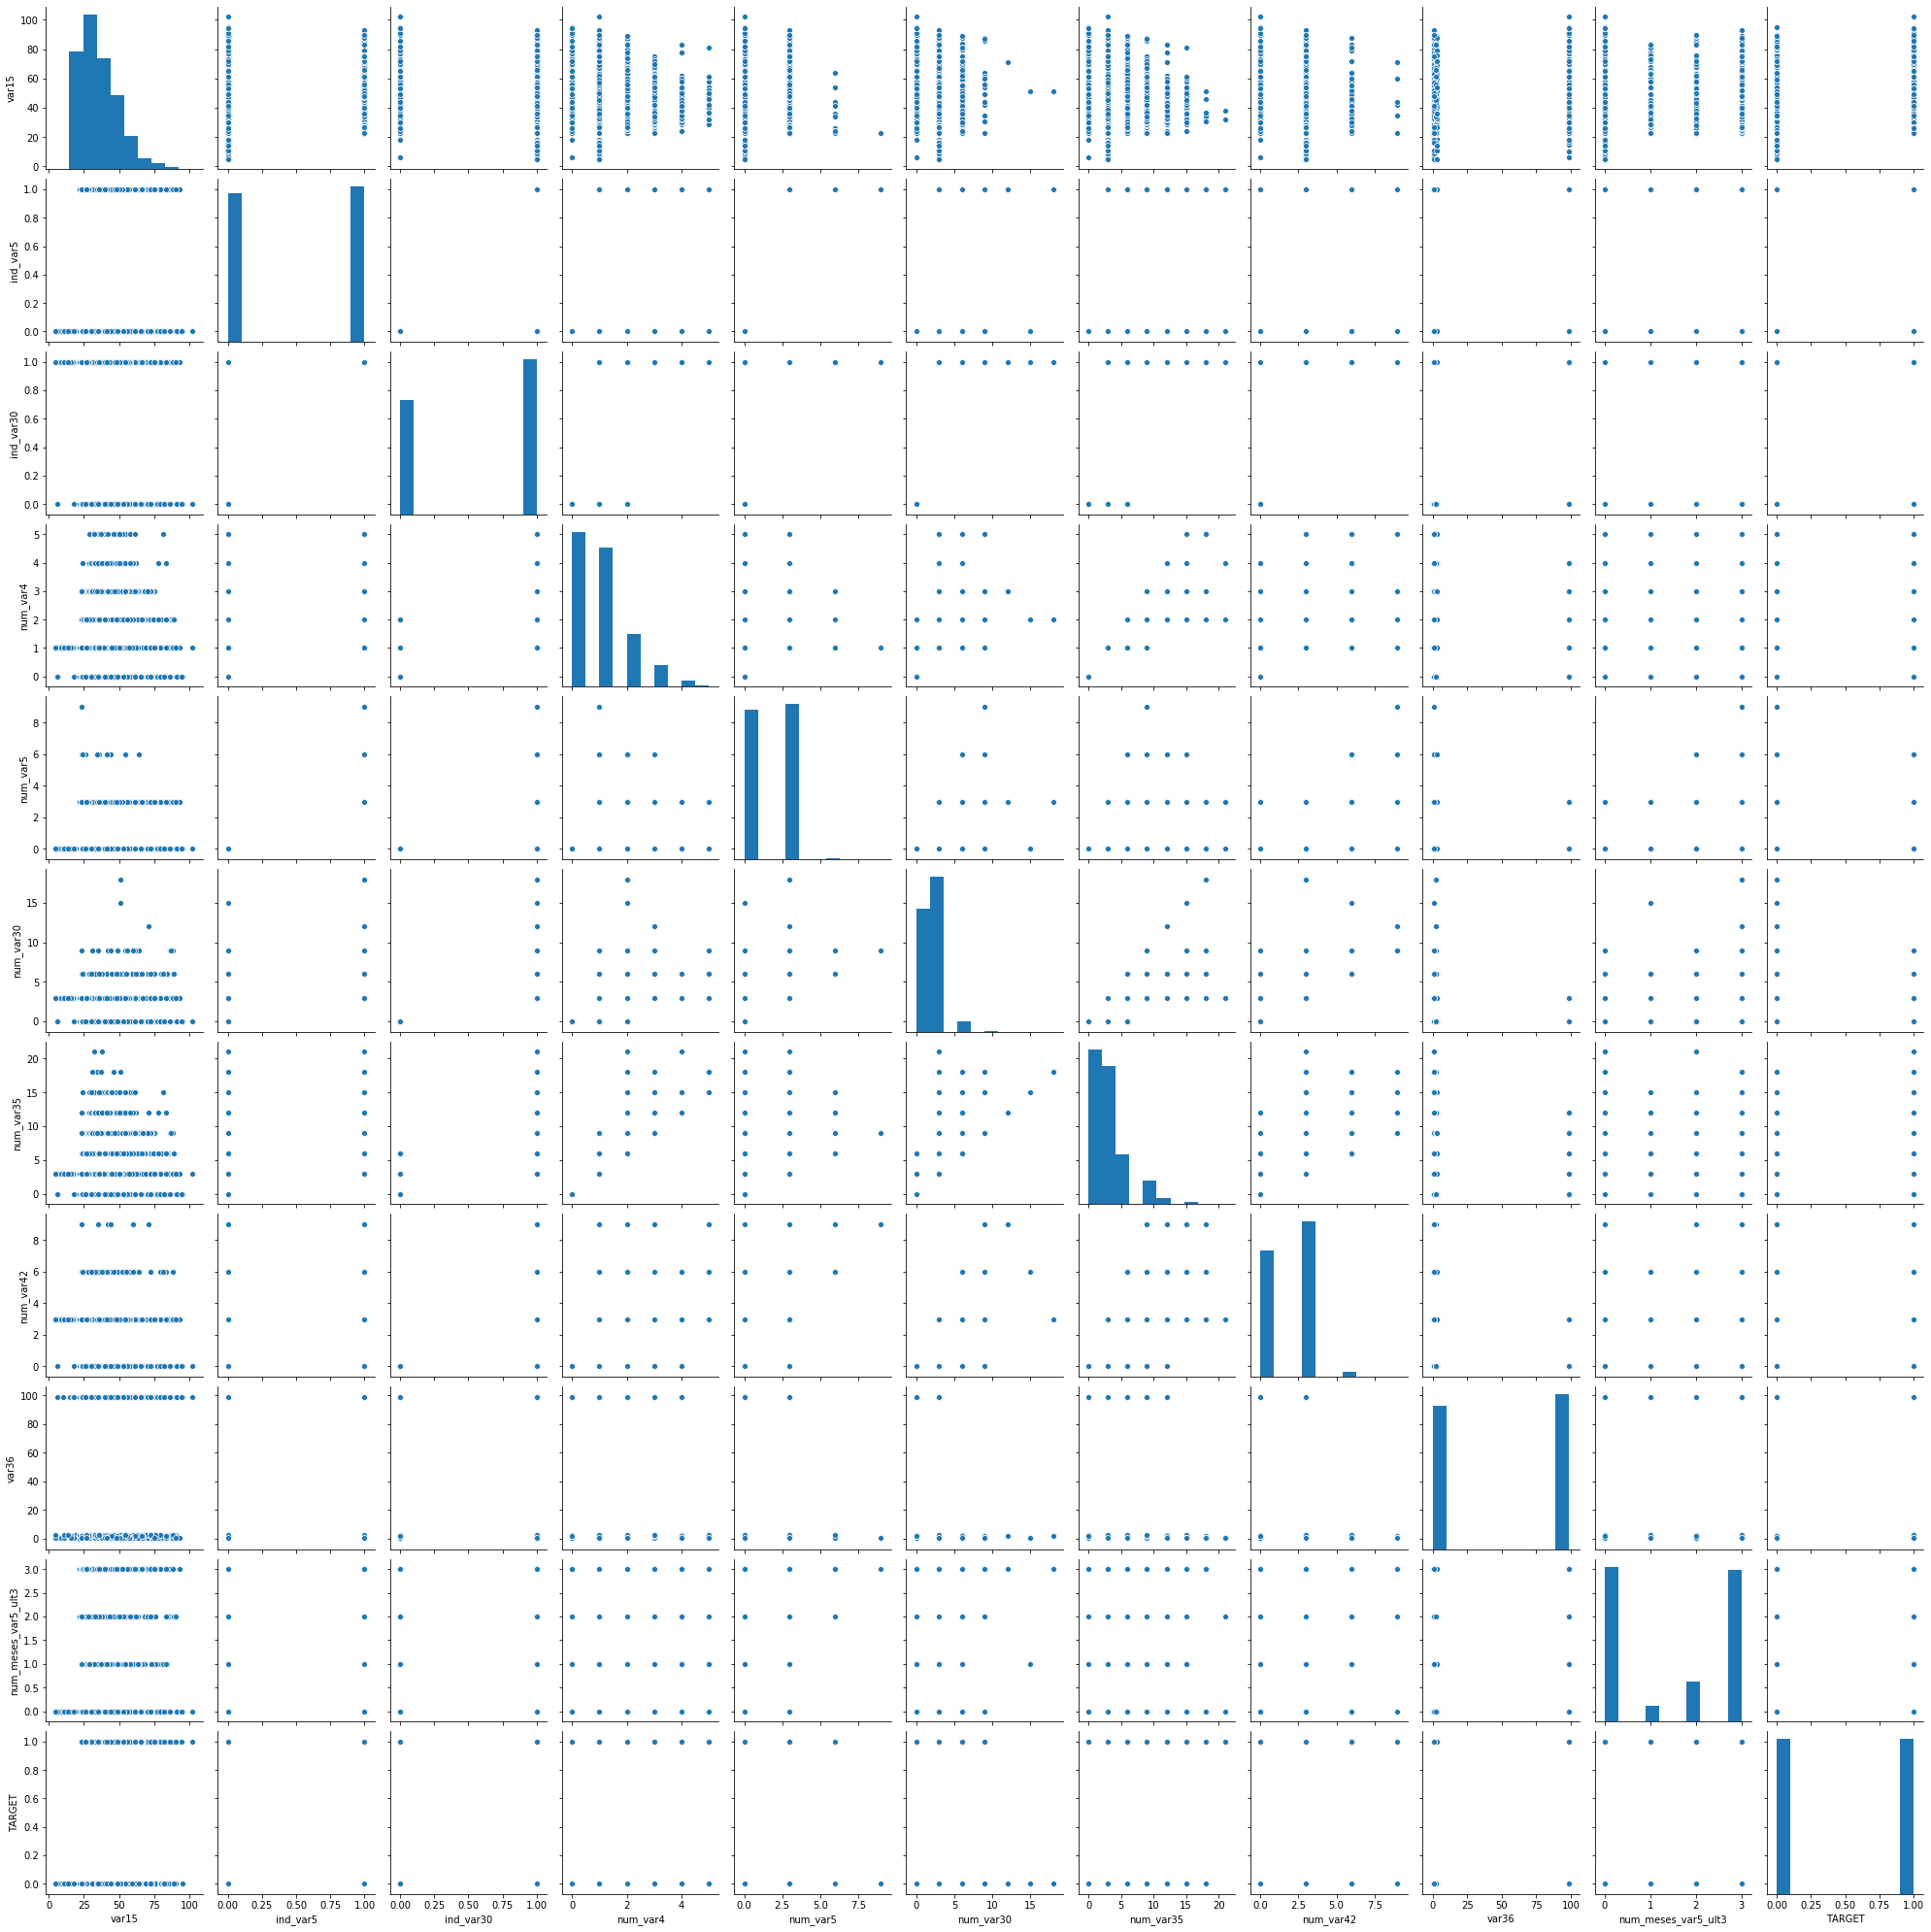

In [66]:
# Pairplot

sns.pairplot(train3)